<a href="https://colab.research.google.com/github/jitu51/mltraining/blob/master/understanding_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Its not a problem of deep learning or tensor flow, its just for understanding. **


First tensorflow, to ease we use tf
np for numpy
for neural network, we import keras a set of sequential layers 

In [ ]:
import tensorflow as  tf
import numpy as np
from tensorflow import keras

Now, lets check what version of tensor we uesd

In [ ]:
print("tensorflow verion :",tf.__version__)

tensorflow verion : 2.3.0


Enable executed eagerly, to execute any operation immediately and return value to python 

In [ ]:
print("Eager mode enabled :",tf.executing_eagerly())

Eager mode enabled : True


Now, we check GPU available or Notavailable



In [ ]:
print("GPU", "Available" if tf.config.list_physical_devices('GPU') else "Notavailable")

GPU Available


Next we will create the simplest possible neural network. 

It has 1 layer, and that layer has 1 neuron, and the input shape with just 1 value and then Assembling the layers into a sequential model.



In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now, we need to compile the model  defining  two function . 1) loss function 2) optimizer function

1)	Loss function:  to calculate how far the actual value

2)	Optimizer function:  to reduce loss , using neural network internal values

In [ ]:
model.compile(optimizer='sgd',loss='mean_squared_error')

Providing data, where’s relation   **Y_train = 5 * X_train + 2**        *(y  = m * x + c*) 

In [ ]:
X_train = np.array([2.50, 3.55, 4.50, 5.60, 6.99, 7.23, 8.45, -2.50, -3.55, -4.50, -5.60, -6.99, -7.23, -8.45,], dtype = float)
Y_train = np.array([14.50, 19.75, 24.50, 30.00, 36.95, 38.15, 44.25, -10.50, -15.75, -20.50, -26.00, -32.95, -34.15, -40.25], dtype = float)

lets see, Is there any pattern of Stateline 

YES,Stateline 

In [ ]:
import matplotlib.pyplot as plt

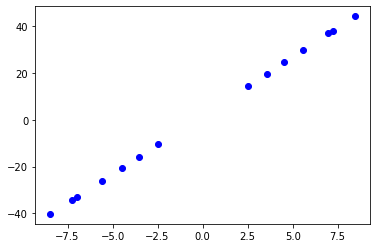

In [ ]:
plt.scatter(X_train, Y_train, color = 'blue')
plt.show()

Now, we predict using this pattern (without tensorflow)

In [ ]:
from statistics import mean

In [ ]:
def prediction (x):
  m = (mean(X_train)*mean(Y_train)-mean(X_train*Y_train))/(mean(X_train)*mean(X_train)-mean(X_train*X_train))
  b = mean(Y_train) - m*mean(X_train)
  y = m *x +b
  return y

In [ ]:
prediction(10)

52.0

In [ ]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 1473.2175
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 141.1616
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 16.5240
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 4.7430
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 3.5152
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 3.2788
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 3.1398
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 3.0147
Epoch 9/500
1/1 [==============================] - 0s 906us/step - loss: 2.8952
Epoch 10/500
1/1 [==============================] - 0s 843us/step - loss: 2.7805
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: 2.6704
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 2.5647
Epoch 13/500
1/1 [==============================] -

In [ ]:
model.predict([10.00])

array([[51.999916]], dtype=float32)

First, we find a pattern which is a linear equation(Y = 5 * X + 2). Using this pattern , we get  52.00 for 10
Secondly, Model  predict  51.999916 for 10, which pattern it used?
Lets see.. 

Model use some internal variable, what’s this 

In [ ]:
model.get_weights()

[array([[5.]], dtype=float32), array([1.999918], dtype=float32)]

Now, we conclude that model also use Y = 52.00*X + 1.999918(~ 2.00)